In [3]:
import numpy as np
from pandas import read_csv
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [4]:
df = read_csv('TSLA.csv')

In [5]:
df = df['close']

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Train = sc.fit_transform(df.values.reshape(-1,1))

In [5]:
X_Train = []
Y_Train = []
b = 20
for i in range(b, Train.shape[0]):
    
    X_Train.append(Train[i-b:i,0])
    
    Y_Train.append(Train[i,0])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(231, 20)
(231,)


In [6]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(231, 20, 1)

In [7]:
X_test=X_Train[-10:,:,:]
y_test=Y_Train[-10:]
X_train=X_Train[0:-10,:,:]
Y_train=Y_Train[0:-10]
print(X_train.shape,Y_train.shape,X_test.shape,y_test.shape)

(221, 20, 1) (221,) (10, 20, 1) (10,)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_Train, Y_Train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
231/231 - 4s - loss: 0.0111
Epoch 2/50
231/231 - 2s - loss: 0.0036
Epoch 3/50
231/231 - 2s - loss: 0.0030
Epoch 4/50
231/231 - 2s - loss: 0.0027
Epoch 5/50
231/231 - 2s - loss: 0.0030
Epoch 6/50
231/231 - 2s - loss: 0.0021
Epoch 7/50
231/231 - 2s - loss: 0.0020
Epoch 8/50
231/231 - 2s - loss: 0.0021
Epoch 9/50
231/231 - 2s - loss: 0.0020
Epoch 10/50
231/231 - 2s - loss: 0.0018
Epoch 11/50
231/231 - 2s - loss: 0.0021
Epoch 12/50
231/231 - 2s - loss: 0.0015
Epoch 13/50
231/231 - 2s - loss: 0.0016
Epoch 14/50
231/231 - 2s - loss: 0.0016
Epoch 15/50
231/231 - 2s - loss: 0.0015
Epoch 16/50
231/231 - 2s - loss: 0.0016
Epoch 17/50
231/231 - 2s - loss: 0.0014
Epoch 18/50
231/231 - 2s - loss: 0.0013
Epoch 19/50
231/231 - 2s - loss: 0.0012
Epoch 20/50
231/231 - 2s - loss: 0.0014
Epoch 21/50
231/231 - 2s - loss: 0.0015
Epoch 22/50
231/231 - 2s - loss: 0.0014
Epoch 23/50
231/231 - 2s - loss: 0.0014
Epoch 24/50
231/231 - 2s - loss: 0.0013
Epoch 25/50
231/231 - 2s - loss: 0.0012
Epoch 26/

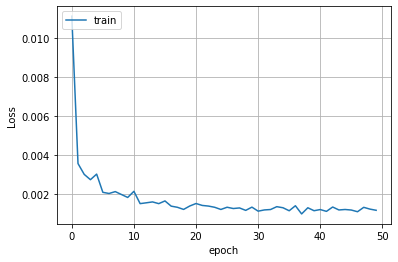

In [10]:
plt.plot(regressor.history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [11]:
y_pred=sc.inverse_transform(regressor.predict(X_test))
y_test=sc.inverse_transform(y_test.reshape(-1,1))

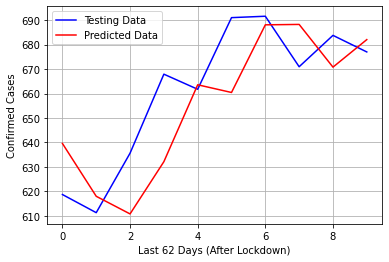

In [12]:
plt.figure()
plt.plot(y_test,label="Testing Data",c="b")
plt.plot(y_pred,label="Predicted Data",c="r")
plt.ylabel("Confirmed Cases")
plt.xlabel("Last 62 Days (After Lockdown)")
plt.legend()
plt.grid()
plt.show()

In [14]:
from tensorflow.keras.models import load_model

regressor.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del regressor  # deletes the existing model

# returns a compiled model
# identical to the previous one
regressor = load_model('my_model.h5')